# Lecture: Feature Importance and Decision Trees
This lecture was held on July 7th by Franziska Boenisch.

The presented study material provides first an overview on how to use off-the-shelf decision trees for training and using decision trees. Then, it offers some hands-on exercises to deepen the understanding. 

In [ ]:
# if you do not already have them, install the libraries needed for the tutorial
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

In [2]:
import pandas as pd             # to have nice data frames
from sklearn import tree        # for the decision tree
import matplotlib.pyplot as plt # for plotting
import numpy as np

In [4]:
# load and show the data
data = pd.read_csv("dataset_tml.csv",index_col=0)
data

,Social Media (min per day),Attends,Passed Exam?
ID,,,
1,30,Yes,Yes
2,110,No,No
3,60,No,No
4,50,Yes,Yes
5,140,Yes,Yes
6,100,Yes,No
7,80,Yes,Yes
8,120,No,No


## Data Plotting

Before doing machine learning, you usually want to understand the data that you are working with. This works best when plotting it.

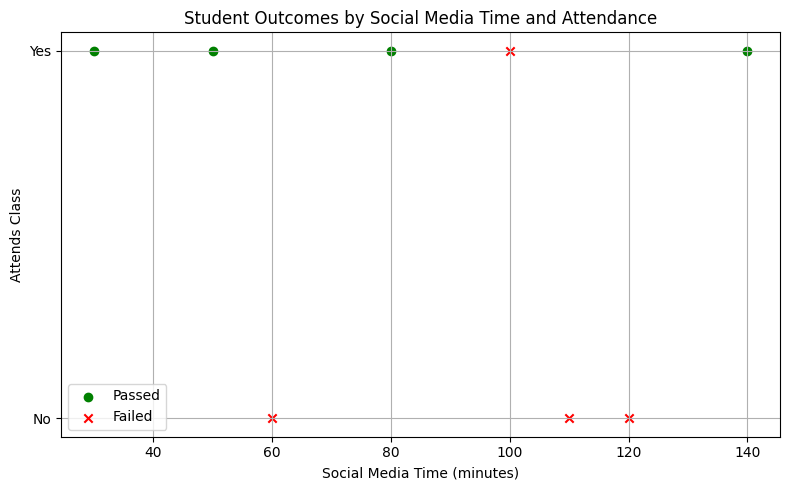

In [5]:
import matplotlib.pyplot as plt

# Map Attends to numeric for y-axis
attends_numeric = data.iloc[:,1].map({"No":0, "Yes":1})

# Masks for Passed/Failed
passed_mask = data.iloc[:,2] == "Yes"
failed_mask = data.iloc[:,2] == "No"

# Plot
plt.figure(figsize=(8,5))

# Passed: green dots
plt.scatter(
    data.loc[passed_mask, data.columns[0]],
    attends_numeric[passed_mask],
    color="green",
    marker="o",
    label="Passed"
)

# Failed: red crosses
plt.scatter(
    data.loc[failed_mask, data.columns[0]],
    attends_numeric[failed_mask],
    color="red",
    marker="x",
    label="Failed"
)

# Formatting
plt.yticks([0,1], ["No","Yes"])
plt.xlabel("Social Media Time (minutes)")
plt.ylabel("Attends Class")
plt.title("Student Outcomes by Social Media Time and Attendance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## SKLearn's Decision Tree

The following code let's you explore the sklearn library and its built-in decision trees.

In [6]:
# We will be buliding two trees, one with gini-based splitting, and the other one based on entropy
clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=3) 
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3) 

In [ ]:
# Pre-process data for training
# Map categorical features and label
data = data.replace({"Yes": 1, "No": 0}) # yes and no strings are mapped to 1 and 0

# Split into features and label
X = data.iloc[:, :-1]  # all columns except "Passed"
Y = data.iloc[:, -1]   # the "Passed" column

In [8]:
# Here is where the actual training happens
clf_gini = clf_gini.fit(X, Y)
clf_entropy = clf_entropy.fit(X, Y)

In [9]:
# This is how predictions work
clf_gini.predict(X)

array([1, 0, 0, 1, 1, 0, 1, 0])

In [10]:
# Compute the feature importance of the tree (first value for time on social media, second for attendance)
clf_gini.feature_importances_

array([0.4, 0.6])

[Text(0.3333333333333333, 0.875, 'x[1] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 90.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 120.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

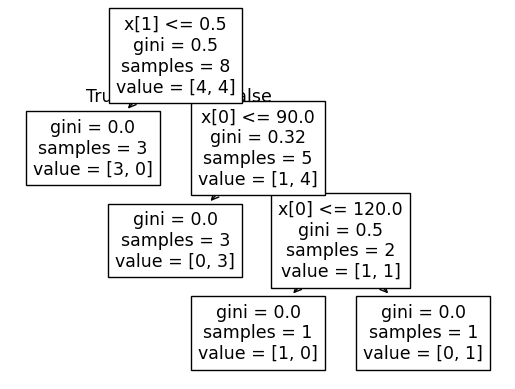

In [ ]:
tree.plot_tree(clf_gini, )

## Get Active and Write Some Functions
The following code is a scaffolding that allows to compute impurity and impurity gain. You can use it to improve your understanding from the lecture.

All the TBD places should be filled with code.

Overall what the code should do is to go iteratively over your dataset, calculate the impurity and impurity gain at every possible split, and based on it output the best split and build the tree.

In [ ]:
import math

feature_names = list(X.columns)

# Select criterion
criterion =  'gini' #'entropy' or 'gini'


# --- Helper functions ---
def entropy(p):
    """TBD"""

def gini(p):
    """TBD"""

def impurity_func(p):
    """TBD"""

def get_impurity(y_subset):
    """TBD"""

def info_gain(parent_y, left_y, right_y):
    """TBD"""

# --- Recursive split trace ---
def explore_splits(X_node, y_node, depth=0):
    if len(y_node) <= 1:
        return

    indent = "  " * depth
    print(f"{indent}Node at depth {depth} with {len(y_node)} samples")
    print(f"{indent}Current impurity: {get_impurity(y_node):.4f}")

    best_gain = -1
    best_split = None

    for feature in X_node.columns:
        values = np.sort(X_node[feature].unique())
        # print(values)
        if X_node[feature].dtype.kind in 'iuf':  # numeric
            thresholds = """TBD: insert how to determine the threshold"""
            # print(thresholds)
            for thresh in thresholds:
                """TBD: find the best gain and ideally print some user-readable output."""
        else:  # categorical (not needed here)
            pass

    if best_split:
        feature, thresh = best_split
        print(f"{indent}=> Best split: {feature} <= {thresh} (gain = {best_gain:.4f})\n")
        left_idx = X_node[feature] <= thresh
        right_idx = ~left_idx
        explore_splits(X_node[left_idx], y_node[left_idx], depth + 1)
        explore_splits(X_node[right_idx], y_node[right_idx], depth + 1)
    else:
        print(f"{indent}=> No good split found.\n")

# --- Run split exploration ---
explore_splits(X, Y)


## Solution

This is an example solution.

In [14]:
import math

feature_names = list(X.columns)

# Select criterion
criterion =  'gini' #'entropy' or 'gini'


# --- Helper functions ---
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

def gini(p):
    return 2 * p * (1 - p)

def impurity_func(p):
    return entropy(p) if criterion == 'entropy' else gini(p)

def get_impurity(y_subset):
    if len(y_subset) == 0:
        return 0
    p = np.mean(y_subset)
    return impurity_func(p)

def info_gain(parent_y, left_y, right_y):
    p_impurity = get_impurity(parent_y)
    w_l = len(left_y) / len(parent_y)
    w_r = len(right_y) / len(parent_y)
    return p_impurity - (w_l * get_impurity(left_y) + w_r * get_impurity(right_y))

# --- Recursive split trace ---
def explore_splits(X_node, y_node, depth=0):
    if len(y_node) <= 1:
        return

    indent = "  " * depth
    print(f"{indent}Node at depth {depth} with {len(y_node)} samples")
    print(f"{indent}Current impurity: {get_impurity(y_node):.4f}")

    best_gain = -1
    best_split = None

    for feature in X_node.columns:
        values = np.sort(X_node[feature].unique())
        # print(values)
        if X_node[feature].dtype.kind in 'iuf':  # numeric
            thresholds = (values[:-1] + values[1:]) / 2 # pairwise averages
            # print(thresholds)
            for thresh in thresholds:
                left_idx = X_node[feature] <= thresh
                right_idx = ~left_idx
                left_y, right_y = y_node[left_idx], y_node[right_idx]
                gain = info_gain(y_node, left_y, right_y)
                print(f"{indent}- Split {feature} <= {thresh}: gain = {gain:.4f}")
                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature, thresh)
        else:  # categorical (not needed here)
            pass

    if best_split:
        feature, thresh = best_split
        print(f"{indent}=> Best split: {feature} <= {thresh} (gain = {best_gain:.4f})\n")
        left_idx = X_node[feature] <= thresh
        right_idx = ~left_idx
        explore_splits(X_node[left_idx], y_node[left_idx], depth + 1)
        explore_splits(X_node[right_idx], y_node[right_idx], depth + 1)
    else:
        print(f"{indent}=> No good split found.\n")

# --- Run split exploration ---
explore_splits(X, Y)


Node at depth 0 with 8 samples
Current impurity: 0.5000
- Split Social Media (min per day) <= 40.0: gain = 0.0714
- Split Social Media (min per day) <= 55.0: gain = 0.1667
- Split Social Media (min per day) <= 70.0: gain = 0.0333
- Split Social Media (min per day) <= 90.0: gain = 0.1250
- Split Social Media (min per day) <= 105.0: gain = 0.0333
- Split Social Media (min per day) <= 115.0: gain = 0.0000
- Split Social Media (min per day) <= 130.0: gain = 0.0714
- Split Attends <= 0.5: gain = 0.3000
=> Best split: Attends <= 0.5 (gain = 0.3000)

  Node at depth 1 with 3 samples
  Current impurity: 0.0000
  - Split Social Media (min per day) <= 85.0: gain = 0.0000
  - Split Social Media (min per day) <= 115.0: gain = 0.0000
  => Best split: Social Media (min per day) <= 85.0 (gain = 0.0000)

    Node at depth 2 with 2 samples
    Current impurity: 0.0000
    - Split Social Media (min per day) <= 115.0: gain = 0.0000
    => Best split: Social Media (min per day) <= 115.0 (gain = 0.0000)

 